<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [4]:
df = pd.read_csv("DMV_Written_Tests.csv")

In [7]:
print(df)

    DMV_Test_1  DMV_Test_2  Results
0    34.623660   78.024693        0
1    30.286711   43.894998        0
2    35.847409   72.902198        0
3    60.182599   86.308552        1
4    79.032736   75.344376        1
..         ...         ...      ...
95   83.489163   48.380286        1
96   42.261701   87.103851        1
97   99.315009   68.775409        1
98   55.340018   64.931938        1
99   74.775893   89.529813        1

[100 rows x 3 columns]


In [8]:
a = np.array("DMV_Written_Tests.csv")

In [9]:
print(a)

DMV_Written_Tests.csv


### Task 3: Visualize the Data
---

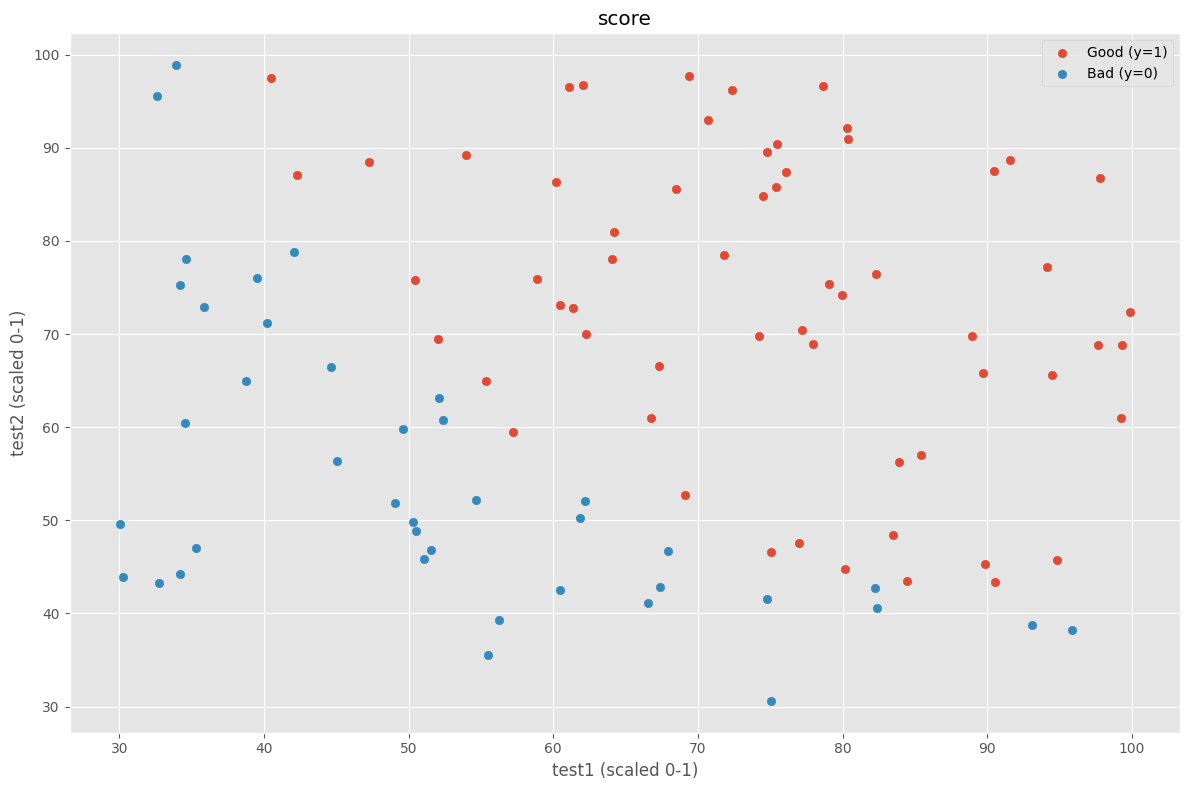

In [13]:
#before scaling the values
test1 = df["DMV_Test_1"].values
test2 = df["DMV_Test_2"].values
y = df["Results"].values.astype(float)
x = np.column_stack([test1, test2])

# Quick scatter
plt.figure()
plt.scatter(x[y==1,0], x[y==1,1], label='Good (y=1)')
plt.scatter(x[y==0,0], x[y==0,1], label='Bad (y=0)')
plt.xlabel('test1 (scaled 0-1)')
plt.ylabel('test2 (scaled 0-1)')
plt.legend()
plt.title('score')
plt.tight_layout()
plt.show()

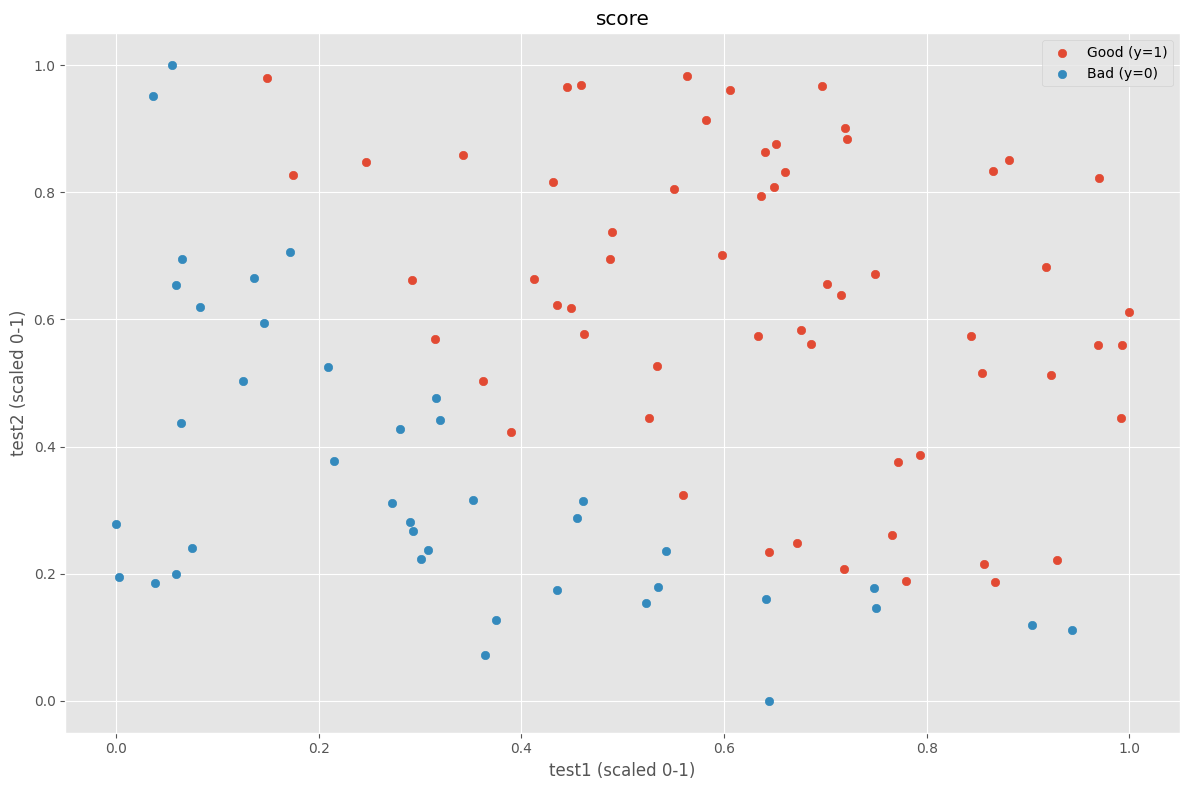

In [12]:
#after scaling the values
def minmax(a: np.ndarray):
  return (a-a.min())/(a.max()-a.min())

test1 = minmax(df["DMV_Test_1"].values)
test2 = minmax(df["DMV_Test_2"].values)
y = df["Results"].values.astype(float)
x = np.column_stack([test1, test2])

# Quick scatter
plt.figure()
plt.scatter(x[y==1,0], x[y==1,1], label='Good (y=1)')
plt.scatter(x[y==0,0], x[y==0,1], label='Bad (y=0)')
plt.xlabel('test1 (scaled 0-1)')
plt.ylabel('test2 (scaled 0-1)')
plt.legend()
plt.title('score')
plt.tight_layout()
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [14]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [15]:

# Cost function and gradient
def compute_cost_and_gradient(theta, X, y):
    m = len(y)  # number of training examples

    # Predictions using sigmoid
    h = sigmoid(X @ theta)   # shape: (m,)

    # Cost function J(theta)
    epsilon = 1e-9  # to avoid log(0)
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

    # Gradient (vectorized)
    gradient = (1/m) * (X.T @ (h - y))   # shape: (n_features,)

    return cost, gradient

### Task 6: Cost and Gradient at Initialization
---

In [16]:
# Add intercept term (bias column)
X = np.c_[np.ones((x.shape[0], 1)), x]   # shape (m, n+1)

# Initialize theta as zeros
theta = np.zeros(X.shape[1])   # (n+1,)

# Compute cost and gradient
cost, grad = compute_cost_and_gradient(theta, X, y)

print("Initial cost:", cost)
print("Initial gradient:", grad)


Initial cost: 0.6931471785599451
Initial gradient: [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [17]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost_and_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)   # predictions
    epsilon = 1e-9
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    gradient = (1/m) * (X.T @ (h - y))
    return cost, gradient

def gradient_descent(X, y, alpha=0.1, num_iters=1000):
    # initialize theta
    theta = np.zeros(X.shape[1])
    cost_history = []

    for i in range(num_iters):
        cost, grad = compute_cost_and_gradient(theta, X, y)
        theta -= alpha * grad   # update step
        cost_history.append(cost)

        # Optional: print progress
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return theta, cost_history


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$